# Wayne Gretzky is considered to be the greatest ice hockey player of all time with an astounding 2857 Career points, more than 936 more points than the Jaromr Jagr who is second with 1921 Career points. His 894 career goals also ranks 1st all time, but is he the greatest goal scorer of all time? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
sns.set()

In [2]:
df = pd.read_csv('OvechkinCareerStats.csv',header = 1)[:-1]

# Here we will load the data, and create the goals per game statistic

Goals Per Game = Goals/Games Played

In [3]:
df['GPG'] = df['G']/df['GP']

In [4]:
df['Season'] = df['Season'].str.split('-').str[0]
df['Season'] = pd.to_datetime(df['Season'],format = '%Y')

In [5]:
def plot_f(df,name):    
    plt.style
    dates = df['Age'].astype(int)
    GPG = df['GPG']

    plt.plot(dates, GPG)
    plt.xlabel('Age')
    plt.ylabel('Goals Per Game')
    plt.title(name + ' Career Goals Per Game')

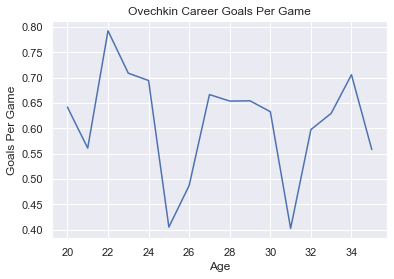

In [6]:
plot_f(df, 'Ovechkin')

In [7]:
df['GPG'].describe()

count    16.000000
mean      0.612036
std       0.107656
min       0.402439
25%       0.560267
50%       0.637443
75%       0.673611
max       0.792683
Name: GPG, dtype: float64

# Here we can see that Ovechkin has averaged 0.6 goals per game throughout his career.

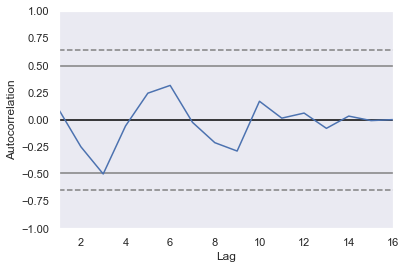

In [8]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA

autocorrelation_plot(df['GPG'])
pyplot.show()

# From this ACF plot we select a moving average parameter of 0

/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


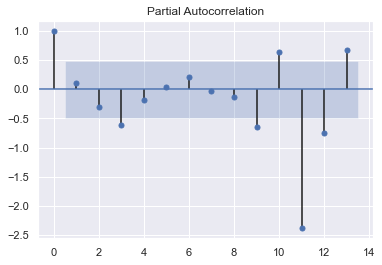

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['GPG'])
plt.show()

# From this PACF plot we select a lag order of 6

In [10]:
# Auto-Regressive Model
model = ARIMA(df['GPG'], order = (6 , 0,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 5)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    GPG   No. Observations:                   16
Model:                 ARIMA(6, 0, 0)   Log Likelihood                  17.535
Date:                Sun, 02 May 2021   AIC                            -19.071
Time:                        12:30:16   BIC                            -12.890
Sample:                             0   HQIC                           -18.754
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6061      0.015     39.201      0.000       0.576       0.636
ar.L1         -0.2132      0.294     -0.724      0.469      -0.790       0.364
ar.L2         -0.1455      0.440     -0.331      0.7

/Users/nickseah/Desktop/PythonAddOns/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [11]:
# Forecast of Ovechkin's goals per game average for the next 5 seasons
forecast

16    0.614041
17    0.490895
18    0.631729
19    0.623505
20    0.686814
dtype: float64

In [12]:
# Forecast of Ovechkin's goals per season for the next 5 seasons
forecast*82

16    50.351364
17    40.253421
18    51.801789
19    51.127399
20    56.318751
dtype: float64

In [13]:
projected_5_year_total_goals = sum(forecast*82)
projected_5_year_total_goals

249.85272396846577

## Ovechkin is currently at 730 goals scored as of May 2nd 2021. Wayne Gretzky is 1st all time at 894 goals scored. He is projected to score 250 more goals in 5 years which would put him at 980. 

## Ovechkin only needs 164 goals to pass Wayne Gretzky for the most goals scored in NHL history. Using our Autoregressive model's forecast he will reach that within the next 3-4 seasons. Considering Ovechkin is only 35 and NHL players such as Jaromir Jagr have played until the age of 46, it is no longer a matter of if Ovechkin will pass Gretzky's goal record, but when.

In [14]:
gretzky_df = pd.read_csv('GretzkyStats.csv',header = 1)[3:-8]

In [15]:
gretzky_df

,Season,Age,Tm,Lg,GP,G,A,PTS,+/-,PIM,...,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI,Awards
3,1979-80,19.0,EDM,NHL,79,51,86,137,14,21,...,1.0,6.0,63.0,22.0,1.0,284,18.0,NaN,NaN,"AS-2,Byng-1,Hart-1"
4,1980-81,20.0,EDM,NHL,80,55,109,164,41,28,...,4.0,3.0,68.0,38.0,3.0,261,21.1,NaN,NaN,"AS-1,Byng-2,Hart-1,Ross-1"
5,1981-82,21.0,EDM,NHL,80,92,120,212,80,26,...,6.0,12.0,79.0,39.0,2.0,370,24.9,NaN,NaN,"AS-1,Byng-3,Hart-1,Pearson-1,Ross-1"
6,1982-83,22.0,EDM,NHL,80,71,125,196,61,59,...,6.0,9.0,85.0,36.0,4.0,348,20.4,NaN,NaN,"AS-1,Byng-5,Hart-1,Pearson-1,Ross-1"
7,1983-84,23.0,EDM,NHL,74,87,118,205,78,39,...,12.0,11.0,80.0,27.0,11.0,326,26.7,NaN,NaN,"AS-1,Byng-6,Hart-1,Pearson-1,Ross-1"
8,1984-85,24.0,EDM,NHL,80,73,135,208,100,52,...,11.0,7.0,92.0,36.0,7.0,354,20.6,NaN,NaN,"AS-1,Byng-15,Hart-1,Pearson-1,Ross-1,Selke-25,..."
9,1985-86,25.0,EDM,NHL,80,52,163,215,71,46,...,3.0,6.0,105.0,43.0,15.0,350,14.9,NaN,NaN,"AS-1,Byng-7,Hart-1,Ross-1,Selke-24"
10,1986-87,26.0,EDM,NHL,79,62,121,183,69,28,...,7.0,4.0,82.0,33.0,6.0,288,21.5,NaN,NaN,"AS-1,Byng-2,Hart-1,Pearson-1,Ross-1"
11,1987-88,27.0,EDM,NHL,64,40,109,149,39,24,...,5.0,3.0,65.0,40.0,4.0,211,19.0,NaN,NaN,"AS-2,Byng-2,Hart-3,Smythe-1"
12,1988-89,28.0,LAK,NHL,78,54,114,168,15,26,...,5.0,5.0,62.0,42.0,10.0,303,17.8,NaN,NaN,"AS-2,Byng-2,Hart-1"


In [16]:
gretzky_df['GPG'] = gretzky_df['G']/gretzky_df['GP']
gretzky_df['Age'] = gretzky_df['Age'].astype(int)

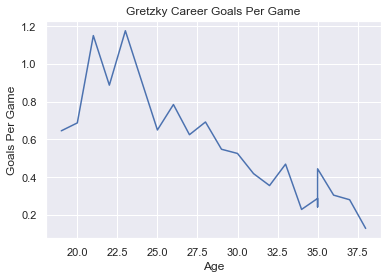

In [17]:
plot_f(gretzky_df, 'Gretzky')

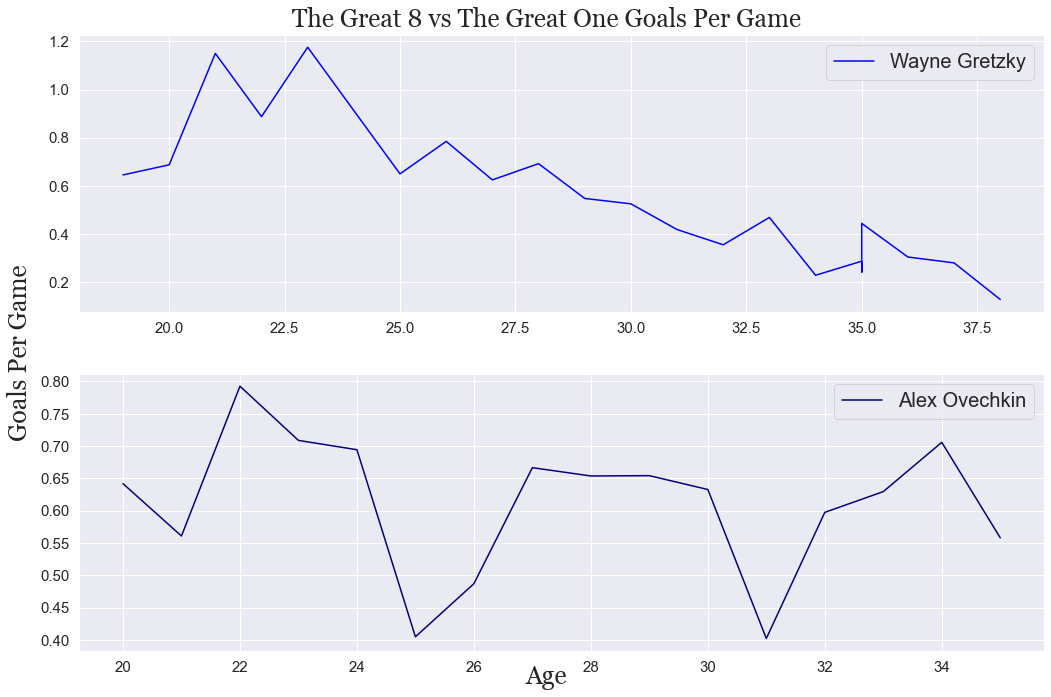

In [18]:
import matplotlib

font = {'fontname': 'Georgia'}

fig, (ax1, ax2) = plt.subplots(2, figsize = (15,10))



fig.suptitle('The Great 8 vs The Great One Goals Per Game',**font,fontsize = 25)
   
ax1.plot(gretzky_df['Age'],gretzky_df['GPG'], label = 'Wayne Gretzky',color = 'Blue')
ax1.legend(loc = 'upper right',prop={"size":20})
ax2.plot(df['Age'],df['GPG'], label = 'Alex Ovechkin',color = 'Navy')
ax2.legend(loc = 'upper right',prop={"size":20})

#ax1.set_title('Gretzky Goals Per Game')
#ax2.set_title('Ovechkin Goals Per Game')
fig.tight_layout(pad=3.5)
fig.text(0.5,0.04,'Age',ha = 'center',fontsize = 25,**font)
fig.text(0.001, 0.5, 'Goals Per Game', va = 'center', rotation = 'vertical',fontsize = 25,**font)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis = 'y', labelsize = 15)
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis = 'y', labelsize = 15)


# plt.plot(dates, GPG)
# plt.xlabel('Age')
# plt.ylabel('Goals Per Game')
# plt.title(name + ' Career Goals Per Game')

# From this graph here, we can see that Wayne Gretzky's goals per game started to decline around age 24. Alex Ovechkin is producing the same amount of goals per game in his 30s as he was in his 20s. Alex Ovechkin possesses arguably the most lethal shot the NHL has ever seen. His one-timer on the powerplay makes goal-tenders everywhere wet their pants. Unlike Gretzky, Ovechkin doesn't rely on his speed to score, which tends to decline with age. With Ovechkin on pace to surpass Gretzky's goal record within the next 3-4 seasons, he will retire as the greatest scorer the ice hockey world has ever witnessed.